In [ ]:
%pip install duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [18]:
from fastdownload import download_url
from fastai.vision.all import *

names = "joe biden", "donald trump"

for n in names:
    urls = search_images(f'{n} face photo', max_images=1)
    dest = f'./joe_or_donald/{"_".join(n.split(" "))}.jpg'
    download_url(urls[0], dest, show_progress=False)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [6]:
# Load dataset
from time import sleep

searches = "joe biden", "donald trump"
path = Path('joe_or_donald')

for o in searches:
    o_refac = "_".join(o.split(" "))
    dest = (path/o_refac)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"{o} photo"))
    sleep(10)
    download_images(dest, urls=search_images(f"{o} angry photo"))
    sleep(10)
    download_images(dest, urls=search_images(f"{o} laughing photo"))
    resize_images(path/o_refac, max_size=400, dest=path/o_refac)


/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [7]:
failed = verify_images(get_image_files(path=path))
failed.map(Path.unlink)
len(failed)


30

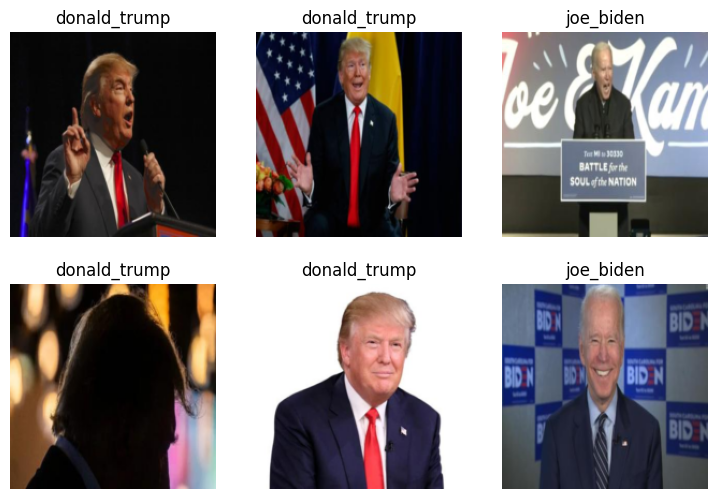

In [8]:
dl = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dl.show_batch(max_n=6)

In [9]:
learn = vision_learner(dl, resnet18, metrics=error_rate)
learn.fine_tune(3)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.939605,1.109465,0.445652,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.315261,0.993860,0.456522,00:02
1,1.053029,0.876003,0.358696,00:01
2,0.854231,0.769734,0.304348,00:01


In [23]:
names = "donald_trump", "joe_biden"

for i, n in enumerate(names):
    pres , _, probs = learn.predict(PILImage.create(f"{path}/{n}.jpg"))
    print(f"Prediction: {pres} confidence: {probs[i]}")

Prediction: donald_trump confidence: 0.74124675989151


Prediction: joe_biden confidence: 0.9624357223510742
